## Problem Statement

In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:
Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [5]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

## convert target variable from object to numeric

In [6]:
train_set.loc[train_set.wage_class == ' <=50K', 'wage_class'] = 0
train_set.loc[train_set.wage_class == ' >50K', 'wage_class'] = 1
test_set.loc[test_set.wage_class == ' <=50K.', 'wage_class'] = 0
test_set.loc[test_set.wage_class == ' >50K.', 'wage_class'] = 1
print(train_set.wage_class.unique())
print(test_set.wage_class.unique())

[0 1]
[0 1]


#### Understand the data

In [7]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [8]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [9]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class         int64
dtype: object

In [10]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


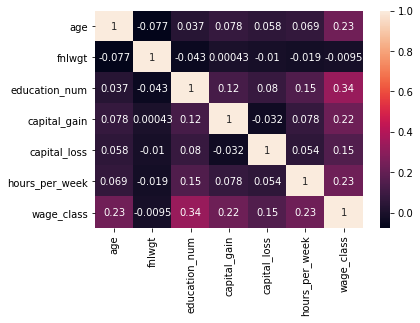

In [11]:
sns.heatmap(train_set.corr(),annot=True)

In [12]:
ObjectCol = train_set.select_dtypes(include='object').columns.values

In [ ]:
pd.crosstab(index=train_set[ObjectCol], columns='wage_class')

In [14]:
train_set_Object = train_set[ObjectCol]

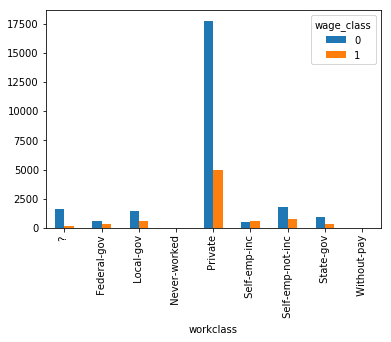

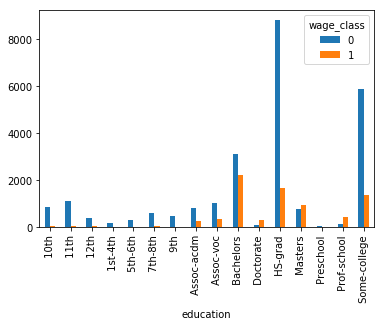

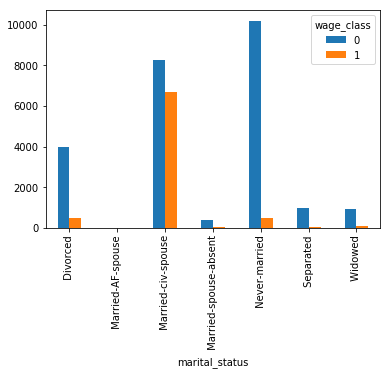

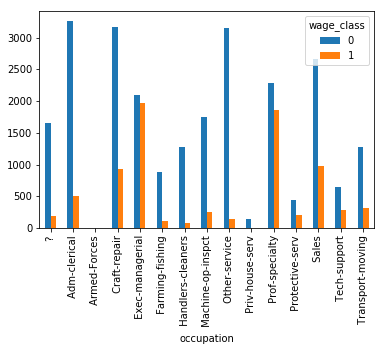

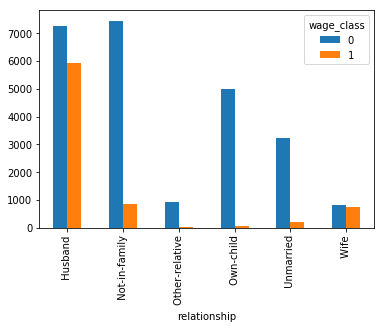

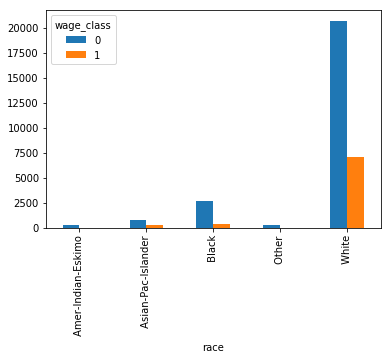

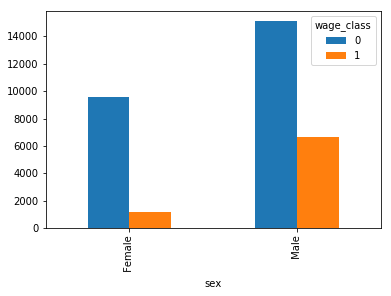

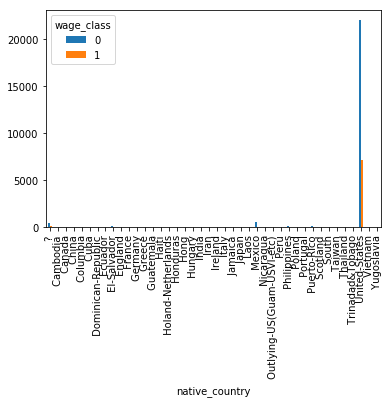

In [15]:
for i in train_set_Object:
    pd.crosstab(index=train_set[i], columns=train_set['wage_class']).plot.bar()

In [16]:
for i in train_set_Object:
    print('*'*30)
    print(i)
    tmp = [i, 'wage_class']
    print(train_set[tmp].corr())
    print('*'*30)

******************************
workclass
            wage_class
wage_class         1.0
******************************
******************************
education
            wage_class
wage_class         1.0
******************************
******************************
marital_status
            wage_class
wage_class         1.0
******************************
******************************
occupation
            wage_class
wage_class         1.0
******************************
******************************
relationship
            wage_class
wage_class         1.0
******************************
******************************
race
            wage_class
wage_class         1.0
******************************
******************************
sex
            wage_class
wage_class         1.0
******************************
******************************
native_country
            wage_class
wage_class         1.0
******************************


In [17]:
pd.crosstab(train_set['wage_class'], train_set['workclass'])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
wage_class,,,,,,,,,
0,1645,589,1476,7,17733,494,1817,945,14
1,191,371,617,0,4963,622,724,353,0


### We will first fit model with all predictors and then only with significant predictors

In [18]:
def convertToDummies(df):
    ObjectCol = train_set.select_dtypes(include='object').columns.values
    catColNames = df.select_dtypes(include='object').columns.values.tolist()
    tmpDF = pd.get_dummies(df, columns=catColNames, drop_first=True)
    return tmpDF

def fitXBGModel(params, Xtrain, Ytrain, n_estimators):
    xgbModel = xgb.XGBClassifier(**params, random_state=12345, n_estimators=n_estimators)
    xgbModel.fit(Xtrain, Ytrain)
    
    return xgbModel

def validateModel(xgbModel, Xtest):
    yProb = xgbModel.predict(Xtest)
    yProb[yProb > 0.5] = 1
    yProb[yProb <= 0.5] = 0
    count = 0
    
    for i in range(len(Ytest)):
        if(yProb[i] != Ytest[i]):
            count += 1    
    return count

##### 1. split data into train and test also drop country column as its having many countries which will create many dummy columns

In [19]:
Ytrain = train_set['wage_class']
Xtrain = convertToDummies(train_set.drop(columns=['native_country', 'wage_class']))
Ytest = test_set['wage_class']
Xtest = convertToDummies(test_set.drop(columns=['native_country', 'wage_class']))

In [20]:
params = {
    'objective':'binary:logistic'    
}
n_estimators = 5

In [21]:
model = fitXBGModel(params, Xtrain, Ytrain, n_estimators)

In [22]:
errorCount = validateModel(model, Xtest)

In [23]:
print('mis classification rate: {} percent'.format(errorCount/Ytest.shape[0]*100))

mis classification rate: 15.521159633929118 percent


#### This is very high error count, its 15%

##### 2. Lets test with only significant variables

In [24]:
# From visualization analysis, it looks like below variables are not significant
significantCols = train_set.columns.tolist()
significantCols.remove('native_country')
significantCols.remove('education')
significantCols.remove('workclass')
significantCols.remove('fnlwgt')

In [25]:
significantCols

['age',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'wage_class']

In [26]:
Ytrain = train_set['wage_class']
Xtrain = convertToDummies(train_set[significantCols].drop(columns=['wage_class']))
Ytest = test_set['wage_class']
Xtest = convertToDummies(test_set[significantCols].drop(columns=['wage_class']))

In [27]:
params = {
    'objective':'binary:logistic'
}
n_estimators = 5

In [28]:
model2 = fitXBGModel(params, Xtrain, Ytrain, n_estimators)

In [29]:
errorCount = validateModel(model2, Xtest)

In [30]:
print('mis classification rate: {} percent'.format(errorCount/Ytest.shape[0]*100))

mis classification rate: 15.521159633929118 percent


### Seems no change in the model performance after dropping significant variables 
3. Tried both models (xgb.XGBClassifier and xgb.XGBRegressor, although Regressor's default objective function is linear regression but we changed it to logistic still there is no improvement in misclassification rate)    Lets try to play around with different parameters of Extreme Gradient Boosting

In [31]:
params = {
    'objective':'binary:logistic',
    'max_depth': 10,
    'eta': 0.1
}
n_estimators = 10

model2 = fitXBGModel(params, Xtrain, Ytrain, n_estimators)
errorCount = validateModel(model2, Xtest)
print('mis classification rate: {} percent'.format(errorCount/Ytest.shape[0]*100))

mis classification rate: 13.580246913580247 percent


### Lets find out optimal parameter to reduce misclassification rate

In [32]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [33]:
# From visualization analysis, it looks like below variables are not significant
significantCols = train_set.columns.tolist()
significantCols.remove('native_country')
significantCols.remove('education')
significantCols.remove('workclass')
significantCols.remove('fnlwgt')
significantCols.remove('wage_class')

Ytrain = train_set['wage_class']
Xtrain = convertToDummies(train_set[significantCols])
Ytest = test_set['wage_class']
Xtest = convertToDummies(test_set[significantCols])

In [34]:
param_dist = {"max_depth": sp_randint(5, 10),
              "n_estimators": sp_randint(50, 150),
              "min_samples_split": sp_randint(2, 6),
              "min_samples_leaf": sp_randint(1, 6),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              'n_estimators':sp_randint(10,100)
             }

In [35]:
rscv = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=param_dist, n_iter=10, verbose=1, scoring='precision', n_jobs=4, cv=5)

In [36]:
rscv.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   49.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   59.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC6EAB1668>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC6EAB1BE0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC6EAB1DD8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FC6EAB1C88>, 'bootstrap': [True, False], 

In [38]:
rscv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 35}

In [39]:
modelWithBestParams = rscv.best_estimator_

In [40]:
YPredicted = modelWithBestParams.predict(Xtest)

In [41]:
print("Model precision during training is {}".format(cross_val_score(modelWithBestParams, Xtrain, Ytrain, scoring='precision', cv=5)))

Model precision during training is [0.78181818 0.80089286 0.78691275 0.81255526 0.79307432]


#### With above validation for 5 set of data, model has 80% precision and 86% accuracy with low variance

In [42]:
print("Model accuracy during testing is {}".format(metrics.accuracy_score(Ytest, YPredicted)))

Model accuracy during testing is 0.8670843314292734


In [43]:
print("Model precision during testing is {}".format(metrics.precision_score(Ytest, YPredicted)))

Model precision during testing is 0.7967537050105857


### Summary and Conclusion
1) We built a model with Extreme Gradient boosting but it had 15% mis classification rate or 85% accuracy 
2) We rebuilt model by keeping only significant variables but still model had same results. 
3) With same model with significant variables, we modified few hyper parameters and model's mis classification rate dropped from 15 o 13%, just a marginal 
4) We rebuilt same model but tried to search optimal hyper tuning parameters but no luck with the results (accuracy and precision)